In [23]:
import pandas as pd
import numpy as np
from konlpy.tag import Mecab
import kss

import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
from collections import Counter

In [24]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [25]:
# text 데이터를 읽어온다.
# file_path = 
all_text ="젠트리피케이션뉴스기사.txt"
print(all_text)
with open(all_text, "r", encoding='utf-8') as f:
 text_li = f.readlines()
print(type(text_li))
print(len(text_li))

젠트리피케이션뉴스기사.txt
<class 'list'>
744


In [26]:
text_li[:3]

['지난해 임대료 상승 1위 ‘성수동’…젠트리피케이션 대응구역 8.6배 확대\n',
 '서울 성동구가 지역상권 보호를 위한 ‘지속가능발전구역’을 성수동 전역으로 대폭 확대하기로 했다. 젊은층들이 찾는 ‘핫플레이스’로 코로나19 확산 기간에도 임대료가 상승한 성수동이 지역 색깔을 잃지 않도록 하려는 선제 대응이다.\n',
 '\n']

In [27]:
#전처리
def preprocessing(text):
    pre_text = []
    for t in range(len(text)):
        # 개행문자 제거
        text[t] = re.sub('\\\\n', ' ', text[t])
        # 특수문자 제거
        text[t] = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text[t])
        # 한글 만 남기고 모두 제거
        text[t] = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]', ' ', text[t])
        # 중복으로 생성된 공백값을 제거
        text[t] = re.sub('[\s]+', ' ', text[t])
        # 영문자를 소문자로
        text[t] = text[t].lower()
        
        text[t] = ' '.join(text[t].split())
        pre_text.append(text[t])
        
    return pre_text

In [28]:
def mecab_pos(sentences):
        
        for i, sentence in enumerate(sentences):
            sent_pos = []
            for word in mecab.pos(sentence):
                if word[1] in ['NNG', 'NNP','NP','NNB' ]:
                    sent_pos.append(word[0])
            sentences[i] = sent_pos
        return sentences

In [50]:
#불용어 처리
def remove_stop_words(toks_):
    
    #불용어를 처리할 목록이있는 txt파일 불러오
    #stopwords 경로 설정
    # file_path = 
    stop_words_f = "./stopwords.txt"
    print(stop_words_f)
    with open(stop_words_f, "r", encoding='utf-8') as f:
         stop_words = f.readlines()
    stop_words = [stop_word.strip() for stop_word in stop_words]
    toks = [word for word in toks_ if not word in stop_words]
    
    return toks

In [58]:
#wordcloud 그리기
from wordcloud import WordCloud
from PIL import Image
def display_wordcloud(text_toks):
    text_toks = ' '.join(text_toks)
    mask = Image.new("RGBA",(680,600), (255,255,255))
    image = Image.open('heart.png').convert("RGBA")
    x,y = image.size
    mask.paste(image,(0,0,x,y),image)
    mask = np.array(mask)
    wordcloud = WordCloud(background_color ='white',
                          random_state = 42,
                          max_words = 100, font_path=r"C:\Windows\Fonts\malgun.ttf",
                          mask = mask, prefer_horizontal = True).generate(text_toks)
    
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [31]:
#전처리 통과
text_li = preprocessing(text_li)
toks = mecab_pos(text_li)
result = sum(toks, [])

In [44]:
len(result)

12617

In [53]:
#확인차 쓸모없는것이 있는지 찾자.
counts = Counter(result)
print(counts.most_common(100))
#불용어 처리
result = remove_stop_words(result)

[('지역', 215), ('임대료', 161), ('시장', 102), ('건물', 98), ('도시', 91), ('상생', 81), ('개발', 78), ('상승', 75), ('상가', 72), ('주민', 69), ('현상', 68), ('상권', 67), ('예산', 67), ('사업', 63), ('방지', 53), ('협약', 51), ('대표', 51), ('서울', 50), ('정책', 50), ('발전', 48), ('문제', 47), ('활성', 47), ('임대차', 47), ('임차인', 46), ('가능', 44), ('주거', 41), ('사회', 40), ('기존', 40), ('추진', 40), ('지속', 39), ('계획', 37), ('필요', 37), ('발생', 36), ('구역', 35), ('말', 35), ('지구', 33), ('경제', 33), ('성동구', 32), ('협력', 32), ('체결', 32), ('주변', 32), ('과정', 32), ('정부', 32), ('백종원', 32), ('대상', 31), ('상인', 31), ('진행', 30), ('경우', 30), ('변화', 30), ('부동산', 30), ('시작', 29), ('관련', 29), ('기업', 29), ('성수동', 28), ('안정', 28), ('인구', 27), ('주택', 27), ('지방', 27), ('마련', 26), ('프로젝트', 26), ('방안', 26), ('가게', 26), ('문래동', 26), ('카페', 25), ('환경', 25), ('토지', 25), ('가격', 25), ('공공', 25), ('결과', 24), ('원주민', 24), ('최근', 24), ('공간', 23), ('지자체', 22), ('지원', 22), ('조사', 22), ('연구', 21), ('시설', 21), ('법', 21), ('계약', 21), ('경리', 21), ('사람', 21), ('중심', 21), ('

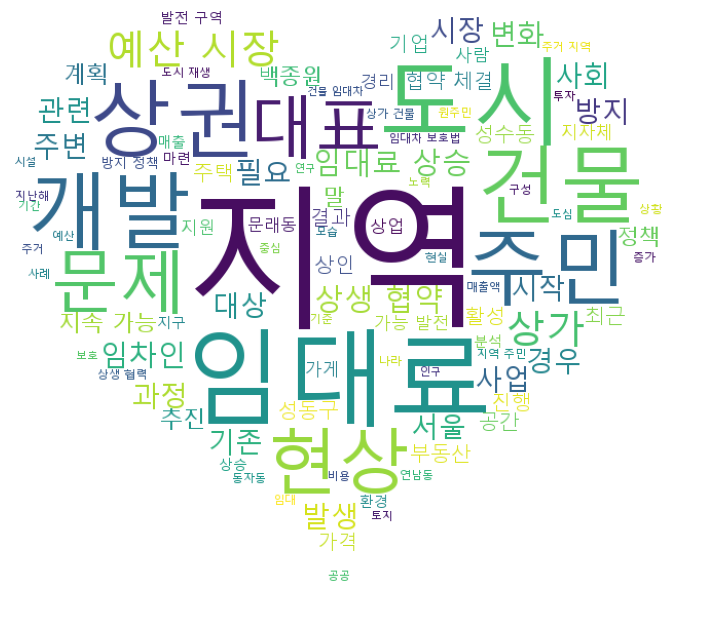

In [59]:
display_wordcloud(result)